In [ ]:
import ast
import pandas as  pd
from datasets import load_dataset
import matplotlib.pyplot as  plt

dataset =load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

C:\Users\alpha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Axes: xlabel='job_title_short'>

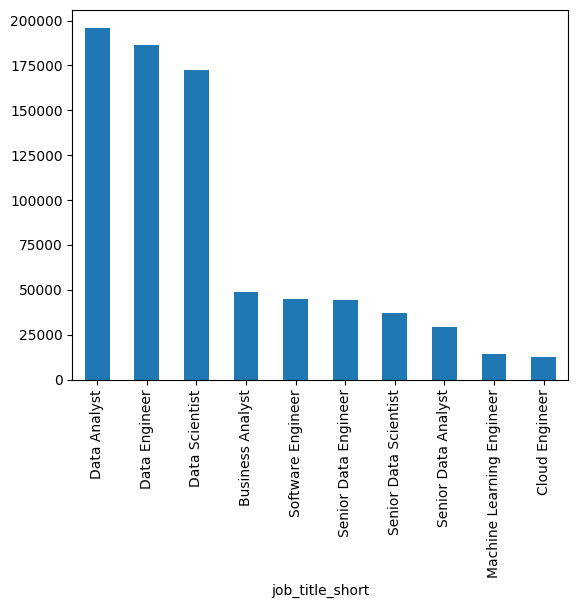

In [ ]:
fig, ax=plt.subplots()
df['job_title_short'].value_counts().plot(kind='bar',ax=ax)

In [ ]:
df['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [ ]:
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

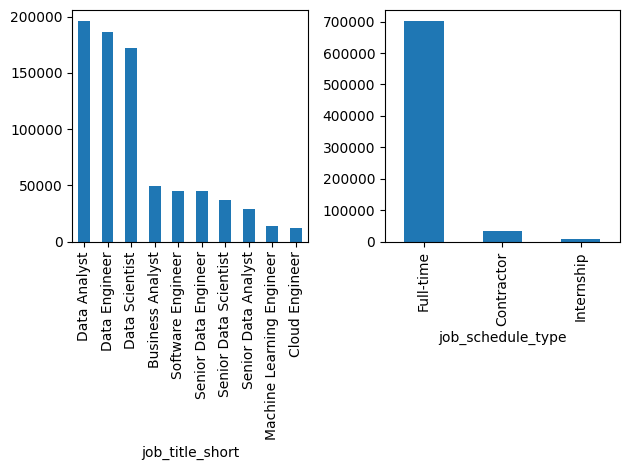

In [ ]:
fig, ax=plt.subplots(1,2)
df['job_title_short'].value_counts().plot(kind='bar',ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar',ax=ax[1])
fig.tight_layout()

In [ ]:
#ex- count of   top  skills in job  post
df_skills=df.copy()
df_skills=df_skills.explode('job_skills')
skills_count=df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count=skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


In [ ]:
job_titles=['Data Scientist','Data Engineer','Data Analyst']

     job_skills job_title_short  skill_count
1480     python  Data Scientist       113711
1823        sql  Data Scientist        78982
1518          r  Data Scientist        59566
1637        sas  Data Scientist        29534
1943    tableau  Data Scientist        29445
     job_skills job_title_short  skill_count
1822        sql   Data Engineer       113130
1479     python   Data Engineer       108022
141         aws   Data Engineer        62049
151       azure   Data Engineer        60674
1772      spark   Data Engineer        53656
     job_skills job_title_short  skill_count
1821        sql    Data Analyst        92428
558       excel    Data Analyst        66860
1478     python    Data Analyst        57190
1941    tableau    Data Analyst        46455
1410   power bi    Data Analyst        39380


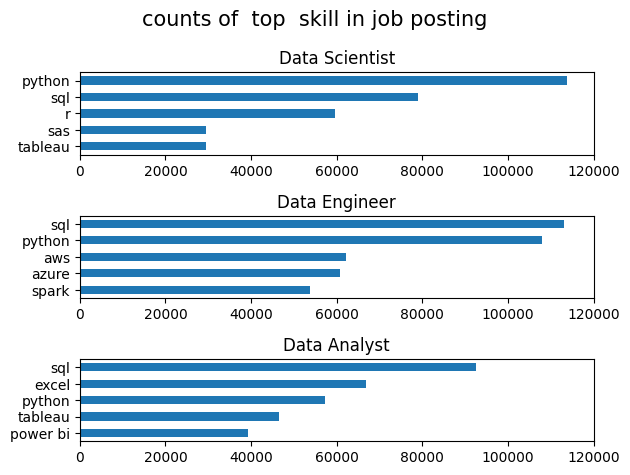

In [ ]:
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[
        df_skills_count['job_title_short'] == job_title
    ].head(5)

    print(df_plot)   # optional: just to see the data

    df_plot.plot(
        kind='barh',
        x='job_skills',
        y='skill_count',
        ax=ax[i],
        title=job_title


    )
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,120000)
    fig.suptitle('counts of  top  skill in job posting',fontsize=15)
    fig.tight_layout()


matplotlib-pie plot

In [ ]:
import ast
import pandas as  pd
from datasets import load_dataset
import matplotlib.pyplot as  plt

dataset =load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Text(0, 0.5, '')

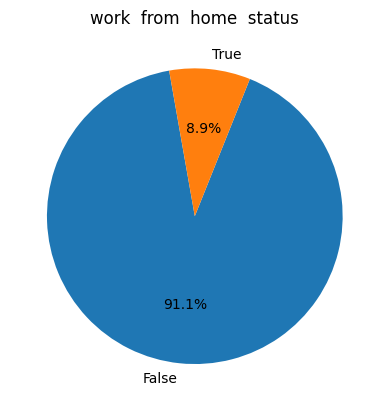

In [ ]:
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=100,autopct='%1.1f%%')
plt.title('work  from  home  status')
plt.ylabel("")


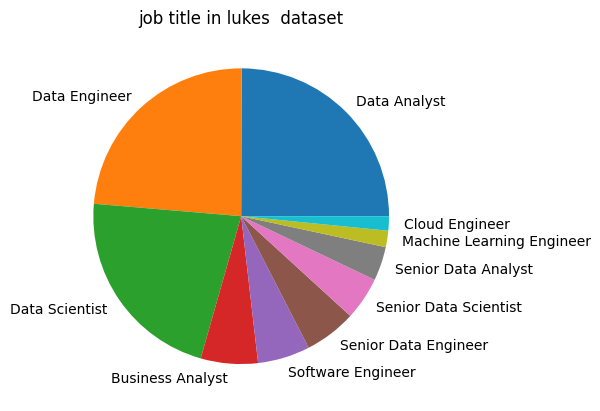

In [ ]:
df['job_title_short'].value_counts().plot(kind='pie')
plt.title('job title in lukes  dataset')
plt.ylabel("")
plt.show()

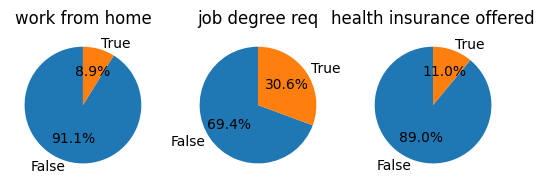

In [ ]:
fig, ax=plt.subplots(1,3) #(row,column)

dict_column = {
    'job_work_from_home': 'work from home', #(dataset_column,title  you want)
    'job_no_degree_mention': 'job degree req',
    'job_health_insurance': 'health insurance offered'
}
for i,  (column,title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(),startangle=90,autopct='%1.1f%%',labels=['False','True'])
    ax[i].set_title(title)

plt.show()    


scatter  plots  matplotlib

<Axes: xlabel='skill_count', ylabel='skill_pay'>

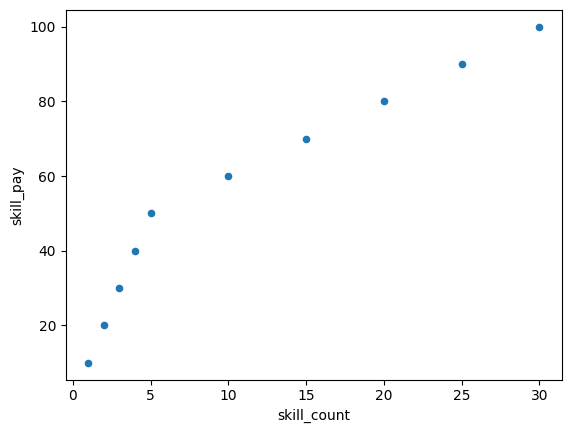

In [ ]:
# simple ex
data = {
    'job_skills': [
        'python', 'sql', 'java', 'c++', 'c#',
        'javascript', 'html', 'css', 'php', 'ruby'
    ],
    'skill_count': [30, 25, 20, 15, 10, 5, 4, 3, 2, 1],
    'skill_pay': [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
}
df=pd.DataFrame(data)
df.plot(kind='scatter',x='skill_count',y='skill_pay')

In [ ]:
#ex 2


In [ ]:
import ast
import pandas as  pd
from datasets import load_dataset
import matplotlib.pyplot as  plt

dataset =load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
df=df[df['job_title_short']=='Data Analyst']

In [ ]:
df_explode=df.explode('job_skills')
skill_stats=df_explode.groupby('job_skills').agg(
    skill_count=('job_skills','count'),
    median_salary=('salary_year_avg','median')
)
skill_stats=skill_stats.sort_values(by='skill_count',ascending=False).head(10)

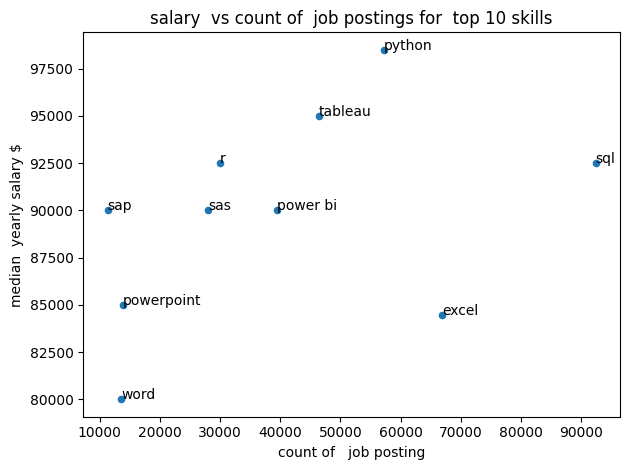

In [ ]:
skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
plt.xlabel('count of   job posting')
plt.ylabel('median  yearly salary $')
plt.title('salary  vs count of  job postings for  top 10 skills')
plt.tight_layout()
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i],txt)
plt.show()

In [ ]:
for i, txt in enumerate(skill_stats.index):
    print(i,txt)

0 sql
1 excel
2 python
3 tableau
4 power bi
5 r
6 sas
7 powerpoint
8 word
9 sap
